In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import h5py

In [28]:
df = pd.read_csv('/project/chihway/raulteixeira/data/BalrogOfTheDECADE_20231002/catbalrog_01.csv.gz')
df_old = pd.read_csv('/project/chihway/raulteixeira/data/BalrogOfTheDECADE_07142023_pgal.csv.gz')

In [74]:
balrog = pd.read_csv('/project/chihway/raulteixeira/data/BalrogOfTheDECADE_20231002.csv.gz')

In [75]:
balrog

,Unnamed: 0,Ai,Ar,Az,ID,IMAFLAGS_i,IMAFLAGS_r,IMAFLAGS_z,Truth_ind,badfrac,...,mcal_FLUX_r,mcal_FLUX_r_ERR,mcal_FLUX_z,mcal_FLUX_z_ERR,ra,true_FLUX_i,true_FLUX_r,true_FLUX_z,true_dec,true_ra
0,0,0.0,0.0,0.0,692673826,0.0,0.0,0.0,231722,1.305641e-04,...,1540.95640,27.631138,5053.73240,83.642600,176.13657,4315.309000,1717.881100,6117.27930,-24.609833,176.13655
1,1,0.0,0.0,0.0,699342530,0.0,0.0,0.0,509927,NaN,...,NaN,NaN,NaN,NaN,NaN,70.429170,27.115665,106.18994,-24.603434,176.13655
2,2,0.0,0.0,0.0,697515001,2.0,2.0,2.0,292377,0.000000e+00,...,1490.97490,35.392330,4621.80660,107.338340,176.13655,3854.485400,1765.133700,5891.61900,-24.597013,176.13652
3,3,0.0,0.0,0.0,712740885,3.0,3.0,3.0,754200,4.301596e-08,...,3006.86550,49.569874,4302.29400,110.376595,176.13650,4607.234400,3819.742400,5543.26030,-24.590630,176.13650
4,4,0.0,0.0,0.0,692572790,0.0,0.0,0.0,220218,NaN,...,NaN,NaN,NaN,NaN,NaN,75.138916,62.588490,68.58676,-24.584148,176.13644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010798,9010798,0.0,0.0,0.0,712651840,0.0,0.0,0.0,729223,0.000000e+00,...,1947.44860,25.662401,2736.90820,61.020870,114.36207,2663.549000,2070.220700,2943.52220,27.475454,114.36205
9010799,9010799,0.0,0.0,0.0,698381020,0.0,0.0,0.0,443521,2.212451e-04,...,761.38776,27.421833,1354.85230,83.027280,114.36207,1018.963700,773.356000,1265.82860,27.481924,114.36206
9010800,9010800,0.0,0.0,0.0,692561984,0.0,0.0,0.0,205404,2.480382e-01,...,203.28778,35.260082,165.73216,46.083694,114.36204,234.331180,155.742050,358.92975,27.488335,114.36204
9010801,9010801,0.0,0.0,0.0,713068894,0.0,0.0,0.0,811984,1.193489e-14,...,699.58765,37.314323,3500.52800,76.128555,114.36205,2428.213000,835.904500,4201.63770,27.494755,114.36206


In [80]:
[col for col in balrog.columns if col not in set(testdf.columns)]

None


In [99]:
to_be_pd = [testdf[col].values for col in testdf.columns]

# col_n_dtypes = [('ID', np.int64), ('mcal_FLUX_r', np.float64), ('mcal_FLUX_r_ERR', np.float64),\
#                 ('mcal_FLUX_i', np.float64), ('mcal_FLUX_i_ERR', np.float64), ('mcal_FLUX_z', np.float64),\
#                 ('mcal_FLUX_z_ERR', np.float64), ('cells', np.int64)]

col_n_dtypes = [(col, type(testdf[col].values[0])) for col in testdf.columns]

In [100]:
col_n_dtypes

[('Unnamed: 0', numpy.int64),
 ('ID', numpy.int64),
 ('mcal_FLUX_i', numpy.float64),
 ('mcal_FLUX_i_ERR', numpy.float64),
 ('mcal_FLUX_r', numpy.float64),
 ('mcal_FLUX_r_ERR', numpy.float64),
 ('mcal_FLUX_z', numpy.float64),
 ('mcal_FLUX_z_ERR', numpy.float64),
 ('ra', numpy.float64),
 ('true_FLUX_i', numpy.float64),
 ('true_FLUX_r', numpy.float64),
 ('true_FLUX_z', numpy.float64),
 ('true_dec', numpy.float64),
 ('true_ra', numpy.float64)]

In [92]:
np.concatenate((['ID'], balrog.columns[~np.isin(balrog.columns, testdf.columns)].values))

array(['Ai', 'Ar', 'Az', 'IMAFLAGS_i', 'IMAFLAGS_r', 'IMAFLAGS_z',
       'Truth_ind', 'badfrac', 'bmask', 'd_arcsec', 'd_contam_arcsec',
       'dec', 'detected', 'inj_class', 'ID'], dtype=object)

In [81]:
testdf.columns

Index(['Unnamed: 0', 'ID', 'mcal_FLUX_i', 'mcal_FLUX_i_ERR', 'mcal_FLUX_r',
       'mcal_FLUX_r_ERR', 'mcal_FLUX_z', 'mcal_FLUX_z_ERR', 'ra',
       'true_FLUX_i', 'true_FLUX_r', 'true_FLUX_z', 'true_dec', 'true_ra'],
      dtype='object')

In [78]:
testdf = pd.read_csv(f'/project/chihway/raulteixeira/data/BalrogOfTheDECADE_20231002/catbalrog_00.csv.gz')
balrog = balrog[[col for col in balrog.columns if col not in set(testdf.columns)].append('ID')]

KeyError: None

In [5]:
with h5py.File('/project/chihway/dhayaa/DECADE/BalrogOfTheDECADE_20231002.hdf5', 'r') as f:
    
    print(f['true_ra'][:])

[176.13655 176.13655 176.13652 ... 114.36204 114.36206 114.362  ]


In [11]:
keylist = ['ID', 'mcal_FLUX_i', 'mcal_FLUX_i_ERR', 'mcal_FLUX_r', 'mcal_FLUX_r_ERR', 'mcal_FLUX_z', 'mcal_FLUX_z_ERR', 'ra', 'true_FLUX_i', 'true_FLUX_r', 'true_FLUX_z', 'true_dec', 'true_ra']

len(keylist)

balrog = {}
t0 = time.time()
with h5py.File('/project/chihway/dhayaa/DECADE/BalrogOfTheDECADE_20231002.hdf5', 'r') as f:
    for key in f.keys():
        print(key)
        balrog[key] = np.array(f[key])
        print(time.time()-t0, 'seconds')

balrog = pd.DataFrame(balrog)

Ai
0.04396533966064453 seconds
Ar
0.07769083976745605 seconds
Az
0.10825085639953613 seconds
ID
0.16283535957336426 seconds
IMAFLAGS_i
0.19202446937561035 seconds
IMAFLAGS_r
0.21933650970458984 seconds
IMAFLAGS_z
0.247528076171875 seconds
Truth_ind
0.27530980110168457 seconds
badfrac
0.3029358386993408 seconds
bmask
0.3153517246246338 seconds
d_arcsec
0.3449397087097168 seconds
d_contam_arcsec
0.3725130558013916 seconds
dec
0.3999340534210205 seconds
detected
0.42754173278808594 seconds
inj_class
0.455460786819458 seconds
mcal_FLUX_i
0.48194003105163574 seconds
mcal_FLUX_i_ERR
0.5094597339630127 seconds
mcal_FLUX_r
0.5369977951049805 seconds
mcal_FLUX_r_ERR
0.56455397605896 seconds
mcal_FLUX_z
0.5925710201263428 seconds
mcal_FLUX_z_ERR
0.6199731826782227 seconds
ra
0.6464071273803711 seconds
true_FLUX_i
0.6744601726531982 seconds
true_FLUX_r
0.7018988132476807 seconds
true_FLUX_z
0.7289383411407471 seconds
true_dec
0.7562503814697266 seconds
true_ra
0.7823777198791504 seconds


In [12]:
balrog

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [70]:
balrog.to_csv('/project/chihway/raulteixeira/data/BalrogOfTheDECADE_20231002.csv.gz')

Ai
0.8203339576721191 seconds
Ar
0.9871499538421631 seconds
Az
1.1171815395355225 seconds
ID
1.499912977218628 seconds
IMAFLAGS_i
1.686739206314087 seconds
IMAFLAGS_r
1.8339219093322754 seconds
IMAFLAGS_z
1.9225106239318848 seconds
Truth_ind
1.959327220916748 seconds
badfrac
2.0791709423065186 seconds
bmask
2.272136926651001 seconds
d_arcsec
2.4869091510772705 seconds
d_contam_arcsec
2.6599979400634766 seconds
dec
2.7966387271881104 seconds
detected
2.9143710136413574 seconds
inj_class
2.9501328468322754 seconds
mcal_FLUX_i
3.1207776069641113 seconds
mcal_FLUX_i_ERR
3.275865316390991 seconds
mcal_FLUX_r
3.3943119049072266 seconds
mcal_FLUX_r_ERR
3.494178533554077 seconds
mcal_FLUX_z
3.6049489974975586 seconds
mcal_FLUX_z_ERR
3.8409368991851807 seconds
ra
4.01064133644104 seconds
true_FLUX_i
4.0900492668151855 seconds
true_FLUX_r
4.3038530349731445 seconds
true_FLUX_z
4.411668300628662 seconds
true_dec
4.494603872299194 seconds
true_ra
4.5887696743011475 seconds


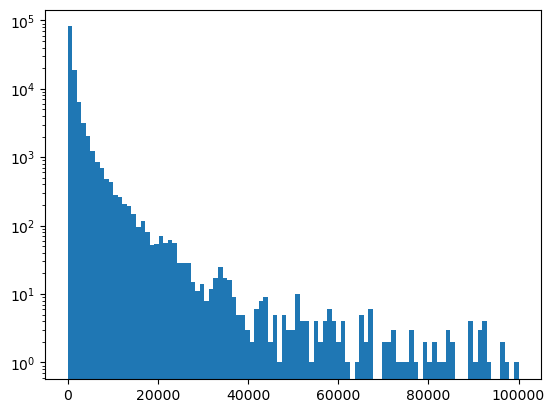

In [42]:
hist_old = plt.hist(df_old['FLUX_i'], bins=np.linspace(1, 1e5, 100));
plt.yscale('log')

In [18]:
(np.isnan(df['mcal_FLUX_i'])|np.isnan(df['mcal_FLUX_r'])|np.isnan(df['mcal_FLUX_z'])|np.isnan(df['mcal_FLUX_i_ERR'])|np.isnan(df['mcal_FLUX_r_ERR'])|np.isnan(df['mcal_FLUX_z_ERR'])).sum()/len(df)

0.49616963474196224

In [14]:
df['mcal_MAG_i']=-2.5*np.log10(df['mcal_FLUX_i'])+30

/home/raulteixeira/.conda/envs/raul/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
df

,Unnamed: 0,ID,mcal_FLUX_i,mcal_FLUX_i_ERR,mcal_FLUX_r,mcal_FLUX_r_ERR,mcal_FLUX_z,mcal_FLUX_z_ERR,ra,true_FLUX_i,true_FLUX_r,true_FLUX_z,true_dec,true_ra,mcal_MAG_i
0,100121,713067531,531.96747,30.336094,257.58234,29.959867,1180.10780,77.752070,118.34781,744.876830,408.07654,1442.88700,22.858686,118.347810,23.185287
1,100122,692449963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.869750,70.16649,249.12158,22.865135,118.347830,NaN
2,100123,712846542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4375.090300,2506.61900,6508.47900,22.871527,118.347824,NaN
3,100124,712825521,1226.13720,35.556137,948.54300,30.011717,1902.22180,69.813770,118.34784,1358.061600,1139.49550,1825.58520,22.877962,118.347860,22.278652
4,100125,698445459,NaN,NaN,NaN,NaN,NaN,NaN,118.34782,224.503020,200.93710,218.45102,22.884369,118.347870,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100116,200237,692470408,772.53186,14.876531,553.63477,15.035099,859.22705,39.157900,153.75899,809.893200,645.33330,999.71220,-0.423360,153.758990,22.780209
100117,200238,699832462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.069275,80.22766,150.81837,-0.416960,153.759030,NaN
100118,200239,699552724,730.37130,17.167934,515.78110,16.994560,655.49330,47.482124,153.75896,886.251340,584.69860,1104.59190,-0.410493,153.758970,22.841141
100119,200240,697285927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.090960,51.14557,110.07798,-0.404105,153.759020,NaN


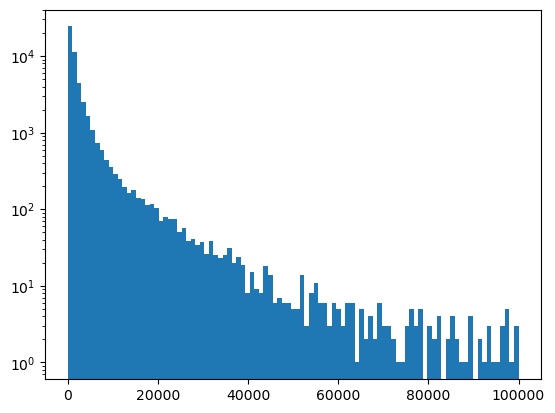

In [43]:
hist = plt.hist(df['mcal_FLUX_i'], bins=np.linspace(1, 1e5, 100));
plt.yscale('log')

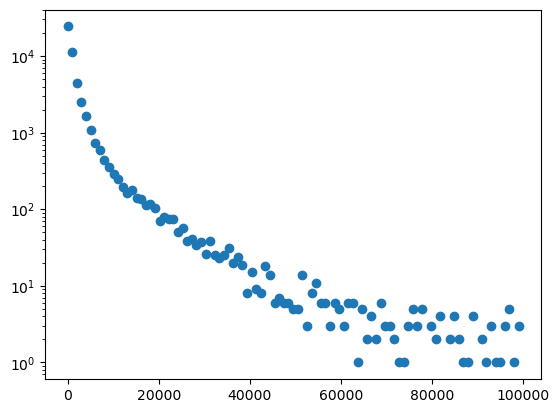

In [55]:
plt.scatter(hist[1][:-1], hist[0])
plt.yscale('log')

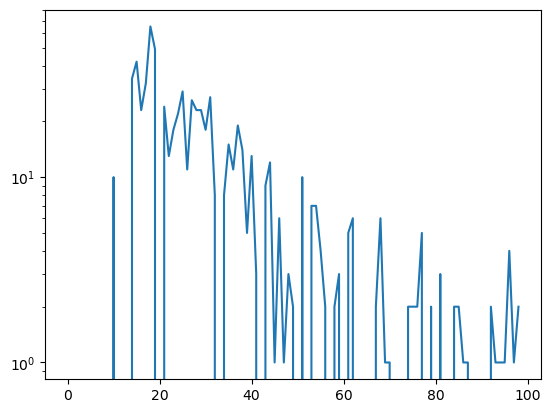

In [56]:
plt.plot(hist[0]-hist_old[0])
plt.yscale('log')

In [57]:
import healpy